In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import linear_model

In [13]:
plt.style.use("ggplot")
%matplotlib inline

In [1]:
run merge_data

./data/img_pixel_coords/py1.txt
./data/img_pixel_coords/my3.txt
./data/img_pixel_coords/px1.txt
./data/img_pixel_coords/mx1.txt
./data/img_pixel_coords/py2.txt
./data/img_pixel_coords/mx3.txt
./data/img_pixel_coords/px2.txt
./data/img_pixel_coords/mx2.txt
./data/img_pixel_coords/px3.txt
./data/img_pixel_coords/py3.txt
./data/img_pixel_coords/py4.txt
./data/img_pixel_coords/my4.txt


In [121]:
# Select for stars taken from mx camera
idx_err_r_mx = data.filter(regex=("err_r_mx.")).notnull().any(axis=1)
df_err_r_mx = data.filter(regex=("err_r_mx.")).loc[idx_err_r_mx]

idx_err_ang_mx = data.filter(regex=("err_ang_mx.")).notnull().any(axis=1)
df_err_ang_mx = data.filter(regex=("err_ang_mx.")).loc[idx_err_ang_mx]

idx_err_mag_mx = data.filter(regex=("err_mag_mx.")).notnull().any(axis=1)
df_err_mag_mx = data.filter(regex=("err_mag_mx.")).loc[idx_err_mag_mx]

df_err_mx = df_err_r_mx.join(df_err_mag_mx)
df_err_mx = df_err_mx.join(df_err_ang_mx)

In [122]:
df_err_mx.head()

,err_r_mx2,err_r_mx3,err_r_mx1,err_mag_mx2,err_mag_mx3,err_mag_mx1,err_ang_mx2,err_ang_mx3,err_ang_mx1
starname,,,,,,,,,
alpha Aps,600.671295,609.249744,NaN,2.804333,1.846509,NaN,136.527220,53.256316,NaN
alpha Cha,770.984141,NaN,NaN,2.827839,NaN,NaN,163.476955,NaN,NaN
alpha Cir,460.124584,476.018649,NaN,2.350287,1.304118,NaN,98.778020,1.257069,NaN
alpha Lup,800.532994,815.840411,636.514009,2.068128,0.364182,0.946469,82.591039,89.052455,82.137848
alpha Mus,183.025800,188.470581,532.972339,2.000192,1.696104,0.801401,145.343055,39.682293,116.397485


In [123]:
df_err_mx.describe()

,err_r_mx2,err_r_mx3,err_r_mx1,err_mag_mx2,err_mag_mx3,err_mag_mx1,err_ang_mx2,err_ang_mx3,err_ang_mx1
count,115.000000,112.000000,21.000000,115.000000,112.000000,21.000000,115.000000,112.000000,21.000000
mean,531.218733,542.145293,563.367792,2.156532,1.708812,0.929566,113.149455,80.949675,58.515381
std,251.130435,263.917057,186.577619,0.625079,0.727067,0.611971,48.388573,46.076543,31.743055
min,9.218313,9.102225,156.328580,0.386807,0.111499,0.081810,1.037714,0.967400,0.190576
25%,356.533943,348.696906,532.972339,1.643484,1.263963,0.623737,79.178141,50.588325,38.660846
50%,596.907934,606.238980,613.679713,2.153519,1.743669,0.823932,125.021398,79.152075,58.762231
75%,740.612167,745.952198,658.501959,2.685261,2.171689,1.076096,152.985004,117.613956,76.849210
max,1009.864620,1013.690734,816.381060,3.149304,3.359154,3.119962,178.109203,173.794751,116.397485


In [124]:
# Build Regression Model


In [125]:
df = df_err_mx[['err_mag_mx2', 'err_r_mx2', 'err_ang_mx2']].dropna()
y_train = np.reshape(df.err_mag_mx2.as_matrix(), (df.shape[0], 1))
x_train = np.reshape(df.err_r_mx2.as_matrix(), (df.shape[0], 1))

# Create polynomial features
x_train_poly = np.hstack((x_train, np.power(x_train,2), np.power(x_train,3)))
#poly = preprocessing.PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)
#x_train_poly=poly.fit_transform(x_train)

# Fit a linear regression model
LR = linear_model.LinearRegression()
LR.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [126]:
y_pred = LR.predict(x_train_poly)

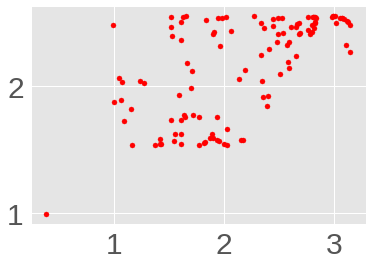

In [127]:
fig, ax = plt.subplots()
ax.plot(y_train, y_pred, '.r')

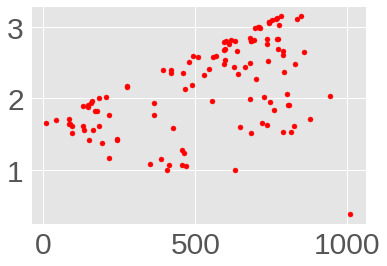

In [128]:
fig2, ax2 = plt.subplots()
ax2.plot(x_train,y_train, '.r')

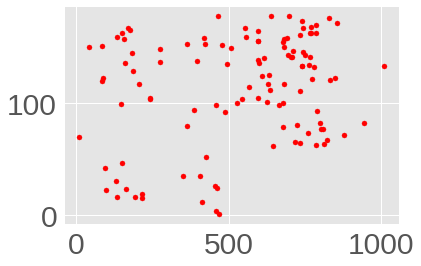

In [134]:
fig3, ax3 = plt.subplots()
ax3.plot(x_train, df.err_ang_mx2.as_matrix(), '.r')

In [132]:
df.head()

,err_mag_mx2,err_r_mx2,err_ang_mx2
starname,,,
alpha Aps,2.804333,600.671295,136.527220
alpha Cha,2.827839,770.984141,163.476955
alpha Cir,2.350287,460.124584,98.778020
alpha Lup,2.068128,800.532994,82.591039
alpha Mus,2.000192,183.025800,145.343055


In [115]:
LR.coef_

array([[ -7.50172409e-03,   2.29153669e-05,  -1.65568194e-08]])

In [116]:
LR.intercept_

array([ 2.25273533])